In [1]:
#Importing libraries

#Essentials
import pandas as pd 
import numpy as np

#models & preprocessing tools
import sklearn
import sklearn.model_selection
import sklearn.preprocessing

# Statistics
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

#graphs 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set

#ignore warnings and pd settings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

import os

In [2]:
#loading the data

#source: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

data_raw = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

data_raw.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
#Exploring dimensionality and data types 

print(data_raw.shape)
data_raw.dtypes

(4340, 8)


name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [4]:
#descriptive statistics

data_raw.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [5]:
#double checking for missing values

data_raw.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [6]:
#Exploring categorical features: 

In [7]:
#The 'name' column doesn't carry much significance, so I'll drop it

data_0 = data_raw.drop('name', axis= 1)

data_0.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [8]:
#Checking amount and frequency of labels in each feature

cat_features = ['fuel', 'seller_type', 'transmission', 'owner']

for col in cat_features:
  print(data_0[col].value_counts())
  print('--------------------------------')

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
--------------------------------
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
--------------------------------
Manual       3892
Automatic     448
Name: transmission, dtype: int64
--------------------------------
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64
--------------------------------


In [9]:
#fuel, seller_type and transmission are nominal, so one-hot encoding will do
#owner could be considered ordinal, so i will do label encoding to preserve that first-second-third relationship

In [10]:
#label encoding 'owner' column

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data_owner_encoded = data_0.copy()

data_owner_encoded['owner'] = encoder.fit_transform(data_0['owner'])

data_owner_encoded.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,0
1,2007,135000,50000,Petrol,Individual,Manual,0
2,2012,600000,100000,Diesel,Individual,Manual,0
3,2017,250000,46000,Petrol,Individual,Manual,0
4,2014,450000,141000,Diesel,Individual,Manual,2


In [11]:
#one hot encoding of fuel, seller_type, transmission

data_with_dummies = pd.get_dummies(data_owner_encoded, drop_first = False)

data_with_dummies.head()

,year,selling_price,km_driven,owner,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,2007,60000,70000,0,0,0,0,0,1,0,1,0,0,1
1,2007,135000,50000,0,0,0,0,0,1,0,1,0,0,1
2,2012,600000,100000,0,0,1,0,0,0,0,1,0,0,1
3,2017,250000,46000,0,0,0,0,0,1,0,1,0,0,1
4,2014,450000,141000,2,0,1,0,0,0,0,1,0,0,1


In [12]:
#dropping some labels

cols_to_drop = ['fuel_Electric', 'seller_type_Trustmark Dealer', 'transmission_Automatic']

data_dummies_dropped = data_with_dummies.drop(cols_to_drop, axis = 1)
data_dummies_dropped.head()

,year,selling_price,km_driven,owner,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Manual
0,2007,60000,70000,0,0,0,0,1,0,1,1
1,2007,135000,50000,0,0,0,0,1,0,1,1
2,2012,600000,100000,0,0,1,0,0,0,1,1
3,2017,250000,46000,0,0,0,0,1,0,1,1
4,2014,450000,141000,2,0,1,0,0,0,1,1


In [14]:
#that's it for categorical features. Let's move on to numeric ones: 

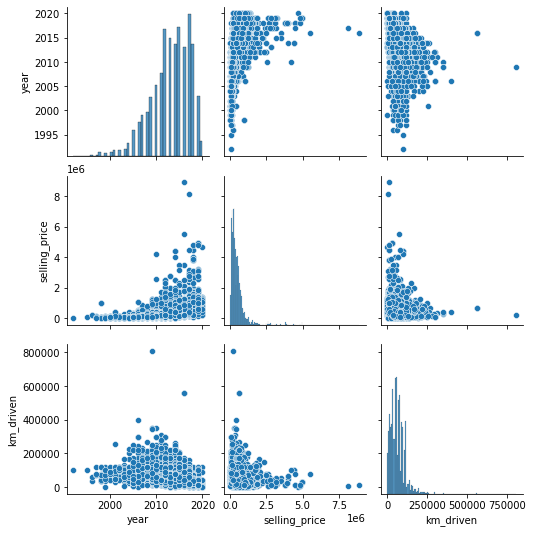

In [13]:
#visualizing scatter plots for all 3 variables  

sns.pairplot(data_dummies_dropped.iloc[:, 0:3])

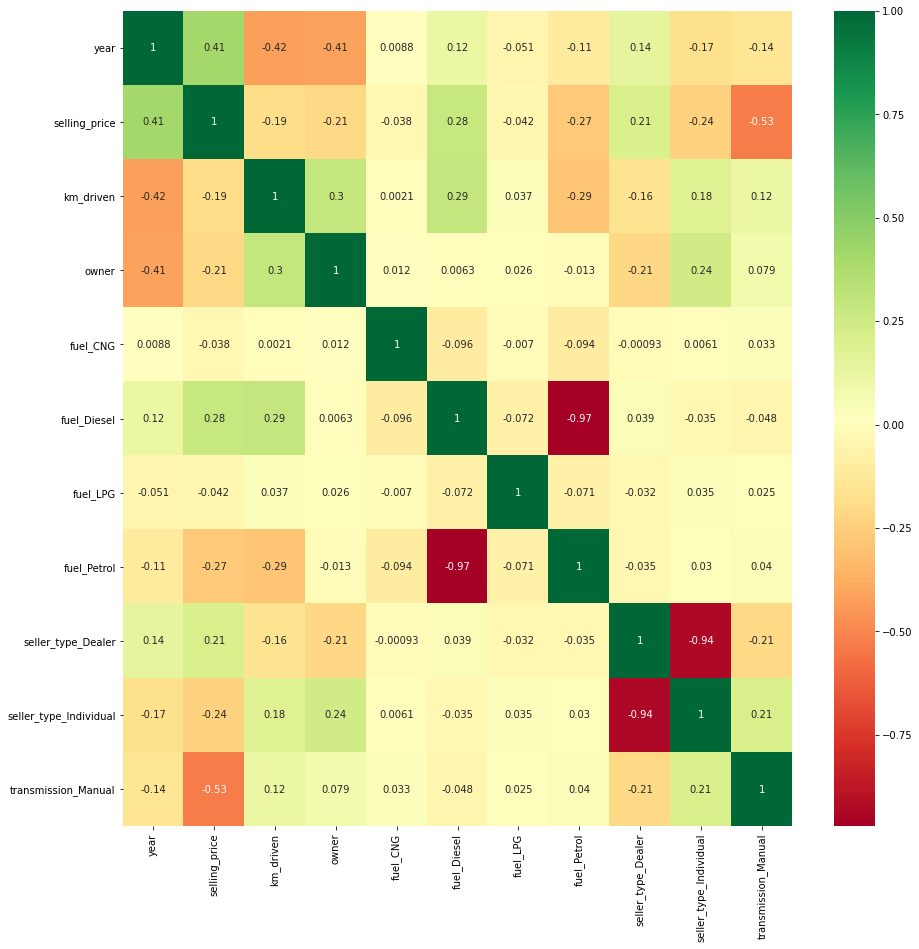

In [15]:
#visualizing correlation table

corr_table = data_dummies_dropped.corr()  

corr_features = corr_table.index 

plt.figure(figsize= (15, 15))

#plot correlation heatmap 
map = sns.heatmap(data_dummies_dropped[corr_features].corr(), annot = True, cmap = 'RdYlGn')

In [18]:
#some of the categorical features have more than 2 levels, which means the default pearson coefficient that the .corr() method calculates isn't valid for them. 
#later, I will be selecting features based on their variance inflation factor (VIF) and feature importance

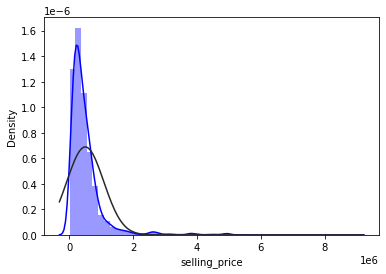

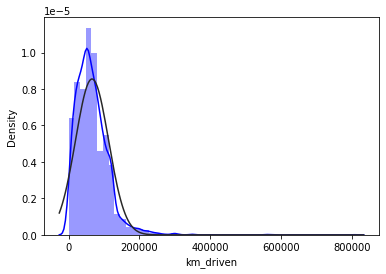

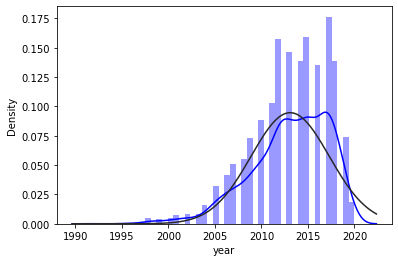

In [20]:
#visualizing distribution plots of numerical features

cols = ['selling_price', 'km_driven', 'year'] 

for col in cols: #loop to get all in a single output
  sns.distplot(data_dummies_dropped[col] , fit=norm, color="b");
  
  plt.show()

Observations lost percent: 0.6682027649769585
Price Kurtosis: 0.024372877369535306
Price Skewness: 0.024808669933358257


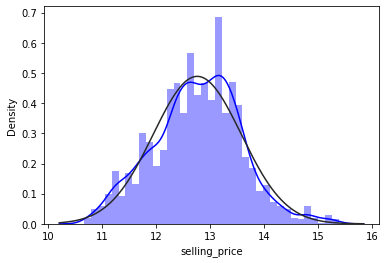

In [21]:
#removing outliers in selling_price and visualizing changes 

data_less_skew_price = data_dummies_dropped.copy()
df = data_dummies_dropped.copy() # I need this dataset so the quantiles are the same despite future changes to data_less_skew

percentile= 0.997 

top = df.quantile(percentile)
bot = df.quantile(1-percentile)

data_less_skew_price = data_less_skew_price[(data_less_skew_price['selling_price'] < top[1]) & (data_less_skew_price['selling_price'] > bot[1])]
data_less_skew_price.reset_index(drop = True)

#results
sns.distplot(np.log(data_less_skew_price['selling_price']), fit = norm, color = 'b') #note: I'm evaluating the log transformation of price since that is what I'll use in the end. 
print('Observations lost percent:', (df.shape[0] - data_less_skew_price.shape[0])/df.shape[0]*100)
print('Price Kurtosis:', np.log(data_less_skew_price['selling_price']).kurt())
print('Price Skewness:', np.log(data_less_skew_price['selling_price']).skew())

Observations lost percent: 2.1198156682027647
Year Kurtosis: 0.16361739576111356
Year Skewness: -0.7303942870891544


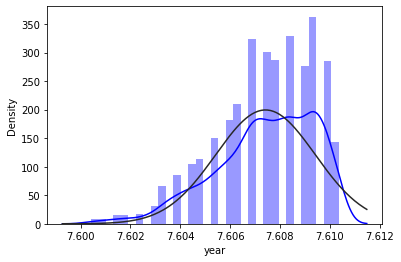

In [22]:
#removing outliers in selling_price and visualizing changes 

data_less_skew_year = data_less_skew_price.copy()

percentile = 0.997

top = df.quantile(percentile) #I'm using the same 'df' copy of the dataframe to calculate quantiles
bot = df.quantile(1-percentile)  

data_less_skew_year = data_less_skew_year[(data_less_skew_year['year'] < top[0]) & (data_less_skew_year['year'] > bot[0])]
data_less_skew_year.reset_index(drop = True)

#results
sns.distplot(np.log(data_less_skew_year['year']), fit = norm, color = 'b') #Again, evaluating the log transformation of price since that is what I'll use in the end. 
print('Observations lost percent:', (df.shape[0] - data_less_skew_year.shape[0])/df.shape[0]*100)
print('Year Kurtosis:', np.log(data_less_skew_year['year']).kurt())
print('Year Skewness:', np.log(data_less_skew_year['year']).skew())

Observations lost percent: 2.1198156682027647
KM Kurtosis: 1.8560716436008073
KM Skewness: -1.087737372070828


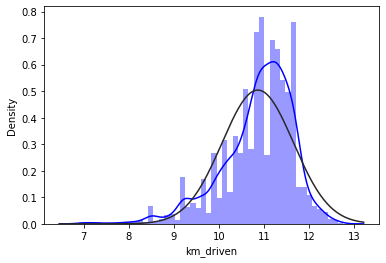

In [23]:
#removing outliers in km_driven and visualizing changes 

data_no_outliers = data_less_skew_year.copy()

percentile= 0.999

top = df.quantile(percentile) #I'm using the same 'df' copy of the dataframe to calculate quantiles
bot = df.quantile(1-percentile)

data_no_outliers = data_no_outliers[(data_no_outliers['km_driven'] < top[2]) & (data_no_outliers['km_driven'] > bot[2])]
data_no_outliers.reset_index(drop = True)

#results
sns.distplot(np.log(data_no_outliers['km_driven']), fit = norm, color = 'b') #note: I'm evaluating the log transformation of price since that is what I'll use in the end. 
print('Observations lost percent:', (df.shape[0] - data_less_skew_year.shape[0])/df.shape[0]*100)
print('KM Kurtosis:', np.log(data_no_outliers['km_driven']).kurt())
print('KM Skewness:', np.log(data_no_outliers['km_driven']).skew())

In [24]:
#checking final percentage of observations lost

obs_lost_percent = (data_dummies_dropped.shape[0] - data_no_outliers.shape[0])/data_dummies_dropped.shape[0]*100
obs_lost_percent

2.5806451612903225

selling_price kurtosis: 0.028073007457222854
selling_price skewness: 0.04218472227569568



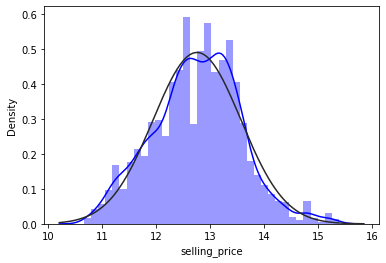

km_driven kurtosis: 1.8560716436008073
km_driven skewness: -1.087737372070828



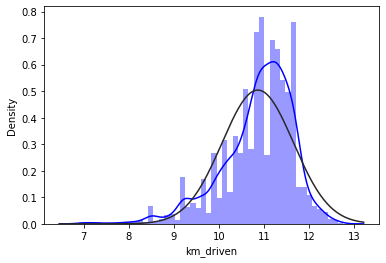

year kurtosis: 0.1589528207481532
year skewness: -0.7308994913424194



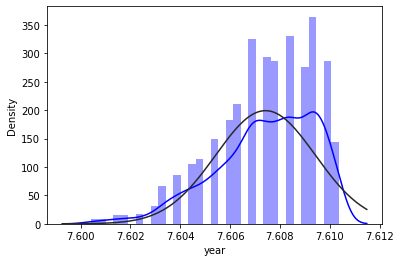

In [25]:
#applying log transformation to all features

data_log = data_no_outliers.copy()

#replacing all 3 columns with their respective log transformations
data_log['selling_price'] = np.log(data_log['selling_price'])
data_log['km_driven'] = np.log(data_log['km_driven'])
data_log['year'] = np.log(data_log['year'])

#visualizing changes in distribution plots
cols = ['selling_price', 'km_driven', 'year'] 

for col in cols: 
  print(col,'kurtosis:', data_log[col].kurt())
  print(col,'skewness:', data_log[col].skew())
  print() 
  sns.distplot(data_log[col] , fit=norm, color="b");
  plt.show()

In [26]:
#descriptive stats of the changes 

print('Price kurtosis:', data_log['selling_price'].kurt())
print('Price skewness:', data_log['selling_price'].skew())
print()

print('km kurtosis:', data_log['km_driven'].kurt())
print('km skewness:', data_log['km_driven'].skew())
print()

print('year kurtosis:', data_log['year'].kurt())
print('year skewness:', data_log['year'].skew())
print()

data_log.iloc[:,0:3].describe()

Price kurtosis: 0.028073007457222854
Price skewness: 0.04218472227569568

km kurtosis: 1.8560716436008073
km skewness: -1.087737372070828

year kurtosis: 0.1589528207481532
year skewness: -0.7308994913424194



,year,selling_price,km_driven
count,4228.000000,4228.000000,4228.000000
mean,7.607423,12.758443,10.858835
std,0.002003,0.813815,0.791081
min,7.600402,10.668955,6.908755
25%,7.606387,12.230760,10.463103
50%,7.607878,12.765688,11.002100
75%,7.608871,13.304685,11.407565
max,7.610358,15.384126,12.757337


selling_price kurtosis: 0.028073007457222854
selling_price skewness: 0.04218472227569568


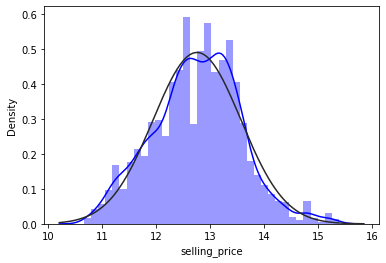

km_driven kurtosis: 1.8560716436008082
km_driven skewness: -1.0877373720708294


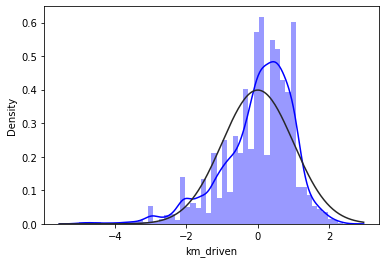

year kurtosis: 0.15895282074974837
year skewness: -0.7308994913440564


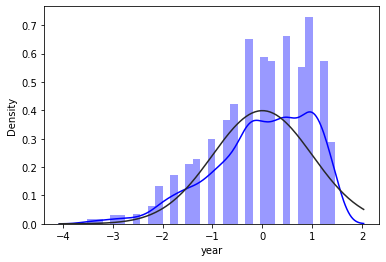

In [33]:
#scaling both features 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = data_no_outliers.copy()

data_scaled['km_driven'] = scaler.fit_transform(data_log['km_driven'].values.reshape(-1,1))
data_scaled['year'] = scaler.fit_transform(data_log['year'].values.reshape(-1,1))
data_scaled['selling_price'] = data_log['selling_price']

#visualizing the changes:
cols = ['selling_price', 'km_driven', 'year'] 

for col in cols: 
  print(col,'kurtosis:', data_scaled[col].kurt())
  print(col,'skewness:', data_scaled[col].skew())
   
  sns.distplot(data_scaled[col] , fit=norm, color="b");
  plt.show()

In [34]:
#Analyzing feature importance quickly by using a regressor from sklearn: 

from sklearn.ensemble import ExtraTreesRegressor 

x = data_scaled.drop('selling_price', axis = 1)
y = data_scaled.iloc[:,1]

model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [35]:
#now I can examine the feature importances
feat_imp = model.feature_importances_
feat_imp

array([0.48464637, 0.18320108, 0.02862337, 0.00056296, 0.11969818,
       0.00056069, 0.00645921, 0.01062348, 0.01534233, 0.15028233])

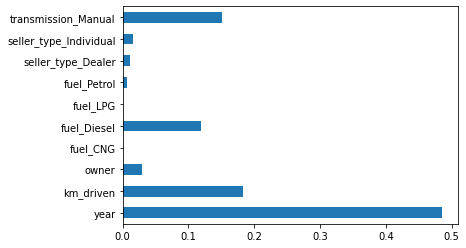

In [36]:
#visualizing feature importances

feat_importances = pd.Series(feat_imp, index = x.columns)
feat_importances.plot(kind = 'barh')
plt.show()

In [37]:
#testing variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = x #dataset from the extra trees regressor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif

,VIF Factor,features
0,1.634899,year
1,1.679692,km_driven
2,1.862425,owner
3,1.481565,fuel_CNG
4,25.484015,fuel_Diesel
5,1.270213,fuel_LPG
6,25.371723,fuel_Petrol
7,10.236814,seller_type_Dealer
8,32.705851,seller_type_Individual
9,10.590215,transmission_Manual


In [38]:
#dropping the features with less importance and highest VIF

data_final = data_scaled.drop(['fuel_Petrol', 'seller_type_Individual', 'fuel_CNG', 'fuel_LPG'], axis = 1)

data_final.head()

,year,selling_price,km_driven,owner,fuel_Diesel,seller_type_Dealer,transmission_Manual
0,-1.511402,11.002100,0.376005,0,0,0,1
1,-1.511402,11.813030,-0.049377,0,0,0,1
2,-0.268849,13.304685,0.826929,0,1,0,1
3,0.970621,12.429216,-0.154791,0,0,0,1
4,0.227308,13.017003,1.261310,2,1,0,1


In [39]:
#testing changes in VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data_final.drop('selling_price', axis = 1) #dataset from the extra trees regressor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif

,VIF Factor,features
0,1.626503,year
1,1.584500,km_driven
2,1.729983,owner
3,2.175483,fuel_Diesel
4,1.269433,seller_type_Dealer
5,2.400737,transmission_Manual


In [59]:
#shuffling data
from numpy import random

indices = np.arange(data_final.shape[0], dtype = int)
random.shuffle(indices)

data_final.index = indices
data_final.sort_index(axis = 0, ascending = True, inplace = True)

data_final.head()

,year,selling_price,km_driven,owner,fuel_Diesel,seller_type_Dealer,transmission_Manual
0,0.722973,13.017003,-0.500300,2,0,0,1
1,0.722973,12.384219,-0.300267,0,0,1,1
2,-0.020709,12.206073,1.057428,0,0,0,1
3,1.218146,13.474428,-4.523633,0,0,1,0
4,-0.268849,11.775290,1.057428,0,1,0,1


In [65]:
#saving copy of the preprocessed data for model selection and testing 
from google.colab import files

data_final.to_csv('data_preprocessed.csv')
files.download('data_preprocessed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>